<a href="https://colab.research.google.com/github/T-Vikas/AI/blob/master/nlp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
data=pd.read_csv("CGB_-_Consumer_Complaints_Data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
data

,Ticket ID,Ticket Created,Date Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Location (Center point of the Zip Code),Type of Property Goods or Services
0,4923410,07/26/2021 09:59:38 PM,07/26/2021,NaN,NaN,TV,Cable,Billing,None,NaN,None,Wenhan,MA,01984,"MA 01984\n(42.59996, -70.881083)",None
1,4947156,08/06/2021 07:56:45 PM,08/06/2021,NaN,NaN,Phone,Wireless (cell phone/other mobile device),Number Portability (keeping your number if you...,None,NaN,None,Highland ranch,CO,80130,"CO 80130\n(39.538985, -104.922934)",None
2,4957510,08/12/2021 05:38:25 PM,08/12/2021,08/12/2021,1:17 p.m.,Phone,Wired,Unwanted Calls,203-760-1637,Prerecorded Voice,203-760-1637,Prospect,CT,06712,"CT 06712\n(41.502221, -72.977336)",unknown_services
3,5396122,04/02/2022 04:01:34 PM,04/02/2022,03/25/2022,6:53 pm,Phone,Wired,Unwanted Calls,641-244-8902,Prerecorded Voice,None,Reston,VA,20194,"VA 20194\n(38.97896, -77.346119)",Health Insurance Services
4,4917724,07/23/2021 02:50:59 AM,07/23/2021,NaN,NaN,Phone,Wireless (cell phone/other mobile device),Billing,None,NaN,None,Fort Lauderdale,FL,33301,"FL 33301\n(26.121518, -80.130442)",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424960,3571557,10/02/2019 01:59:30 PM,10/02/2019,NaN,NaN,Internet,Cable,Privacy,None,NaN,None,Los Angeles,CA,90018.0,"CA 90018\n(34.028153, -118.317664)",NaN
2424961,3452551,08/08/2019 10:14:32 PM,08/08/2019,NaN,NaN,Phone,Wireless (cell phone/other mobile device),Availability (including rural call completion),None,NaN,None,Forney,TX,75126.0,"TX 75126\n(32.741009, -96.445011)",NaN
2424962,3462071,08/13/2019 08:28:07 PM,08/13/2019,08/13/2019,3:17 pm,Phone,Wireless (cell phone/other mobile device),Unwanted Calls,None,NaN,None,Milwaukee,WI,53212.0,"WI 53212\n(43.072177, -87.909398)",NaN
2424963,3470655,08/16/2019 10:54:22 PM,08/16/2019,08/16/2019,3:46 PM,Phone,Wireless (cell phone/other mobile device),Unwanted Calls,661-471-3009,Prerecorded Voice,None,Huntington Beach,CA,92648.0,"CA 92648\n(33.677244, -118.005046)",NaN


In [12]:
data.columns

Index(['Ticket ID', 'Ticket Created', 'Date Created', 'Date of Issue',
       'Time of Issue', 'Form', 'Method', 'Issue', 'Caller ID Number',
       'Type of Call or Messge', 'Advertiser Business Number', 'City', 'State',
       'Zip', 'Location (Center point of the Zip Code)',
       'Type of Property Goods or Services'],
      dtype='object')

In [14]:
data["Type of Property Goods or Services"].value_counts()

None                                   239121
Other Services                          17777
Auto Warranty Services                   7225
other_services                           2997
Health Insurance Services                2602
Unknown Services                         2589
auto_warranty_services                   2571
Medicare Medicaid Services               2143
Amazon Services                          2003
Political Services                       1684
Credit Card Debt Services                1684
Mortgage Loans Services                  1344
Prizes Won Something Services            1136
Solar Panels Services                     962
Credit Card Interest Rates Services       826
Home Improvement Services                 810
Student Loans Services                    746
Legal Actions Services                    538
Medical Devices Services                  522
Computer Other Services                   512
unknown_services                          483
amazon_services                   

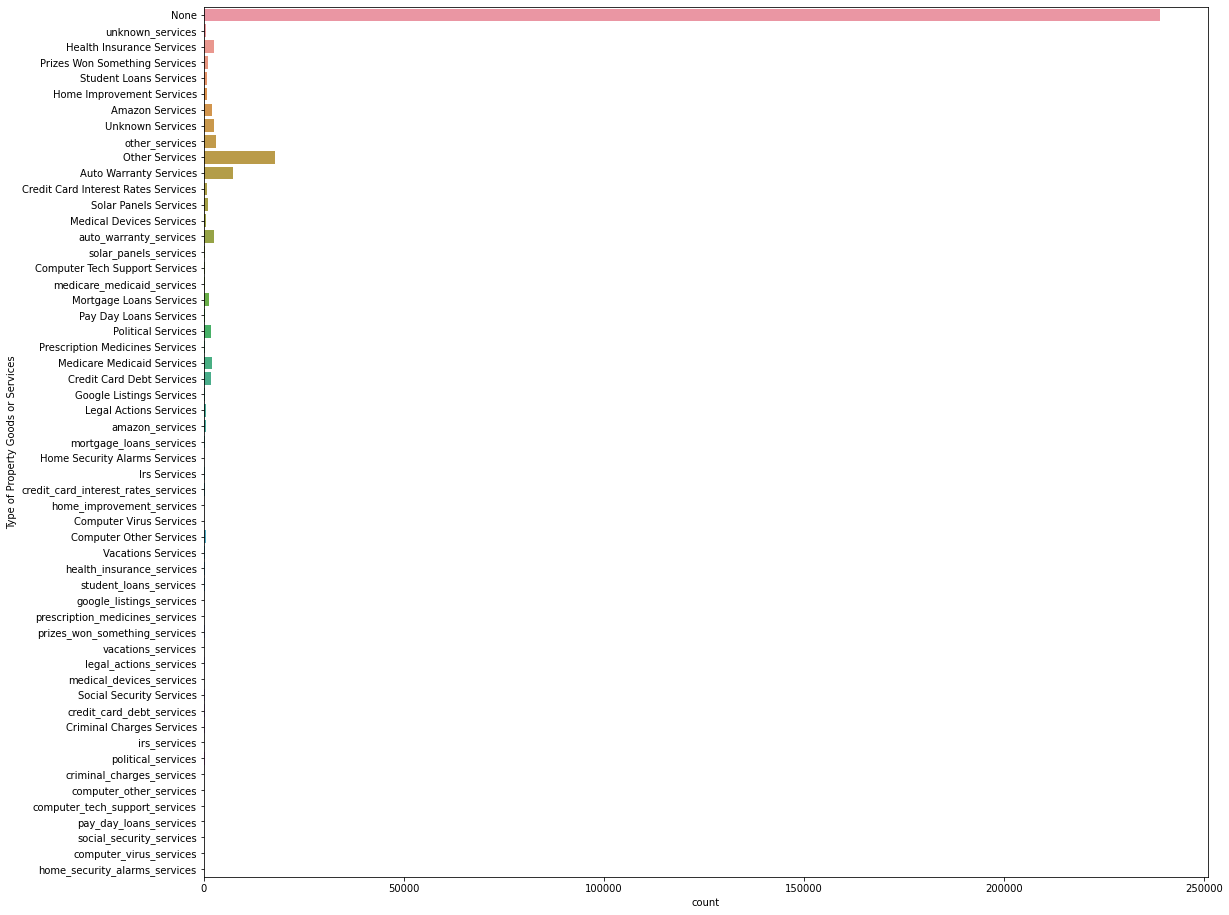

In [18]:
fig,ax = plt.subplots(figsize=(18,16))
sns.countplot(y='Type of Property Goods or Services',data=data)

In [21]:
print(data.shape)
df1=data.dropna()
df1.shape

(2424965, 16)


(97591, 16)

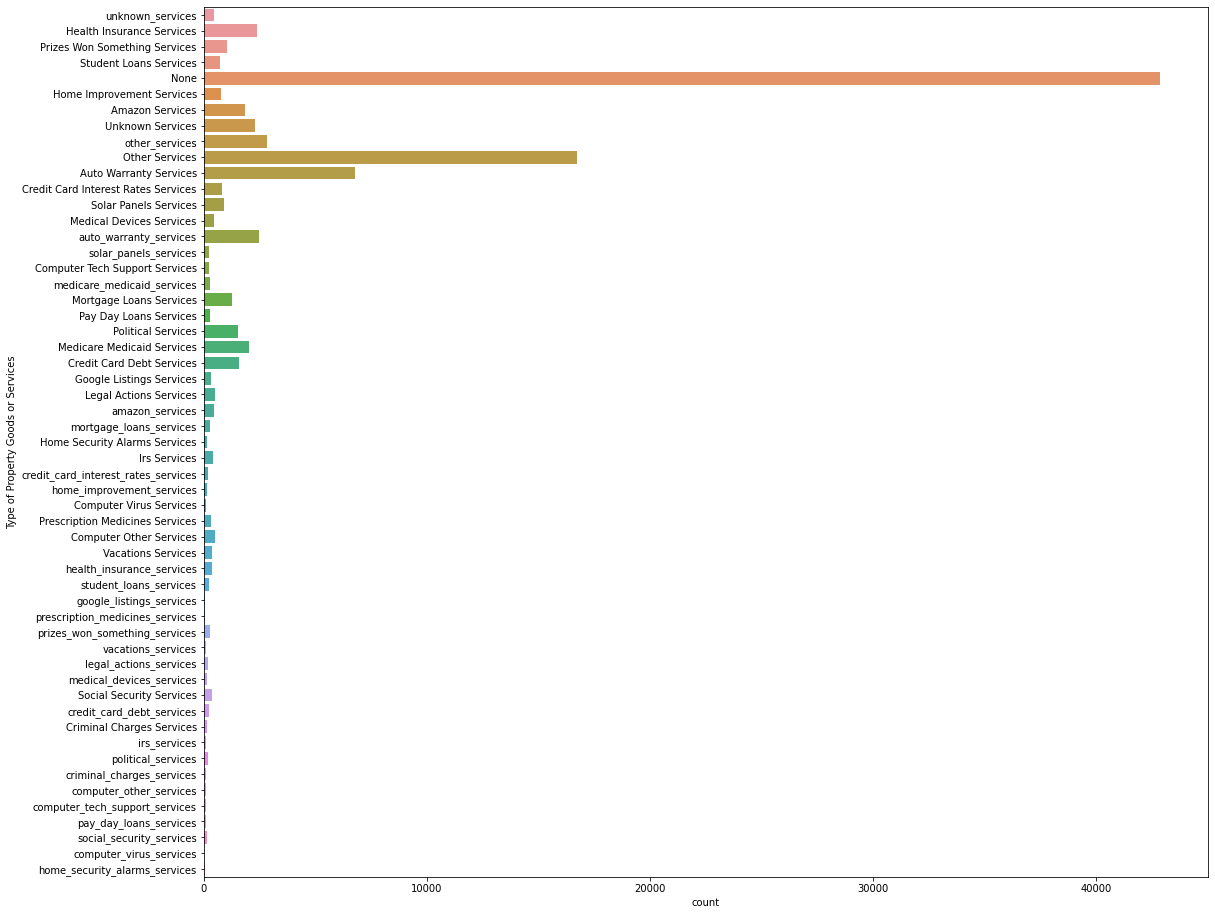

In [22]:
fig,ax = plt.subplots(figsize=(18,16))
sns.countplot(y='Type of Property Goods or Services',data=df1)

In [23]:
data.columns

Index(['Ticket ID', 'Ticket Created', 'Date Created', 'Date of Issue',
       'Time of Issue', 'Form', 'Method', 'Issue', 'Caller ID Number',
       'Type of Call or Messge', 'Advertiser Business Number', 'City', 'State',
       'Zip', 'Location (Center point of the Zip Code)',
       'Type of Property Goods or Services'],
      dtype='object')

In [27]:
data.Issue.unique()

array(['Billing',
       'Number Portability (keeping your number if you change providers)',
       'Unwanted Calls', 'Availability (including rural call completion)',
       'Availability', 'Equipment',
       'Cramming (unauthorized charges on your phone bill)', 'Indecency',
       nan, 'Interference', 'Interference (including signal jammers)',
       'Loud Commercials', 'Privacy', 'Speed', 'Junk Faxes',
       'Pirate Radio', 'Other', 'Tower', 'Phone',
       'Closed Captioning on TV',
       'Slamming (change of your carrier without permission)',
       'Telecommunications Relay Service (TRS)',
       'Closed Captioning over the Internet', 'Commercials/Promotions',
       'Video Description',
       'Hearing Aid Compatibility of Wireless Phones',
       'Rural Call Completion', 'Emergency Information on TV',
       'Hearing Aid Compatibility of Wireline Phones', 'Robocalls',
       'Open Internet/Net Neutrality',
       'Telemarketing (including do not call and spoofing)'], dtype=o

In [26]:
df1.Issue.unique()

array(['Unwanted Calls'], dtype=object)

In [33]:
df1.groupby('Issue').count()

,Ticket ID,Ticket Created,Date Created,Date of Issue,Time of Issue,Form,Method,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Location (Center point of the Zip Code),Type of Property Goods or Services
Issue,,,,,,,,,,,,,,,
Unwanted Calls,97591,97591,97591,97591,97591,97591,97591,97591,97591,97591,97591,97591,97591,97591,97591


In [29]:
data.Issue.value_counts()

Unwanted Calls                                                      1028466
Billing                                                              361816
Telemarketing (including do not call and spoofing)                   210892
Availability                                                         152614
Robocalls                                                            102602
Equipment                                                            100057
Availability (including rural call completion)                        71765
Privacy                                                               59133
Interference                                                          55024
Speed                                                                 47980
Indecency                                                             47440
Open Internet/Net Neutrality                                          42916
Number Portability (keeping your number if you change providers)      36313
Loud Commerc

In [35]:
data[data.Issue.isna()]

,Ticket ID,Ticket Created,Date Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Location (Center point of the Zip Code),Type of Property Goods or Services
20,4900193,07/14/2021 06:29:09 AM,07/14/2021,NaN,NaN,Broadband Story,NaN,NaN,None,NaN,None,NaN,CA,95037,"CA 95037\n(37.138729, -121.652852)",None
60,5207181,12/23/2021 08:19:49 PM,12/23/2021,NaN,NaN,Broadband Story,NaN,NaN,None,NaN,None,NaN,WI,53705,"WI 53705\n(43.072618, -89.461782)",None
89,4953358,08/10/2021 08:06:38 PM,08/10/2021,NaN,NaN,Request for Dispute Assistance,NaN,NaN,None,NaN,None,North olmsted,OH,44070,"OH 44070\n(41.416324, -81.915783)",None
326,5206162,12/23/2021 12:10:43 PM,12/23/2021,NaN,NaN,Broadband Story,NaN,NaN,None,NaN,None,NaN,OR,97352,"OR 97352\n(44.751826, -123.026649)",None
411,5396636,04/02/2022 10:18:10 PM,04/02/2022,08/01/2021,NaN,Accessibility,NaN,NaN,None,NaN,None,Meadow creek,WV,25977,"WV 25977\n(37.799662, -80.904195)",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422166,3554499,09/24/2019 06:18:20 PM,09/24/2019,NaN,NaN,Request for Dispute Assistance,NaN,NaN,NaN,NaN,NaN,Willow Springs,IL,60480,"IL 60480\n(41.728135, -87.875258)",NaN
2422289,3497742,08/28/2019 08:24:40 PM,08/28/2019,NaN,NaN,Request for Dispute Assistance,NaN,NaN,None,NaN,None,Noblesville,IN,46060,"IN 46060\n(40.048131, -85.955786)",NaN
2424183,3562411,09/27/2019 04:10:32 PM,09/27/2019,NaN,NaN,Request for Dispute Assistance,NaN,NaN,None,NaN,None,Ocala,FL,34472,"FL 34472\n(29.115781, -82.016963)",NaN
2424242,3575726,10/03/2019 07:10:06 PM,10/03/2019,NaN,NaN,Accessibility,NaN,NaN,NaN,NaN,NaN,Plano,TX,75023,"TX 75023\n(33.056173, -96.734404)",NaN


In [36]:
df2=data[data.Issue.notna()]

In [41]:
df2[df2.Issue.isna()]

,Ticket ID,Ticket Created,Date Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Location (Center point of the Zip Code),Type of Property Goods or Services


In [43]:
df2=df2[df2["Type of Property Goods or Services"].notna()]

In [44]:
df2[df2["Type of Property Goods or Services"].isna()]

,Ticket ID,Ticket Created,Date Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Location (Center point of the Zip Code),Type of Property Goods or Services


In [45]:
df2.shape

(294843, 16)

In [46]:
df2["Ticket Created"]=pd.to_datetime(df2["Ticket Created"])

<ipython-input-46-5132b5f15a22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Ticket Created"]=pd.to_datetime(df2["Ticket Created"])


In [48]:
df2.head(1)

,Ticket ID,Ticket Created,Date Created,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,City,State,Zip,Location (Center point of the Zip Code),Type of Property Goods or Services
0,4923410,2021-07-26 21:59:38,07/26/2021,NaN,NaN,TV,Cable,Billing,None,NaN,None,Wenhan,MA,01984,"MA 01984\n(42.59996, -70.881083)",None


In [49]:
df2["Ticket Created"].min(),df2["Ticket Created"].max()

(Timestamp('2020-11-06 16:22:15'), Timestamp('2023-01-07 01:37:14'))

In [50]:
df2["month"]=df2["Ticket Created"].dt.month

<ipython-input-50-b36926c70181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["month"]=df2["Ticket Created"].dt.month


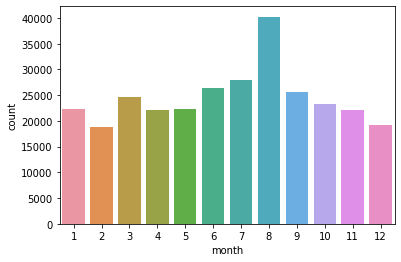

In [52]:
sns.countplot(x="month",data=df2)

In [61]:
df3=pd.DataFrame(df2.groupby("Type of Property Goods or Services").Issue.value_counts())

In [66]:
df3

Issue
Type of Property Goods or Services Issue                
Amazon Services                    Unwanted Calls   1992
                                   Availability        4
                                   Billing             4
                                   Speed               3
Auto Warranty Services             Unwanted Calls   7191
...                                                  ...
social_security_services           Unwanted Calls    139
solar_panels_services              Unwanted Calls    263
student_loans_services             Unwanted Calls    252
unknown_services                   Unwanted Calls    483
vacations_services                 Unwanted Calls    107

[165 rows x 1 columns]

In [73]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Issue"] = data["Issue"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
